<a href="https://colab.research.google.com/github/YunJuyoung1913790/SMU_ITB2022/blob/main/ITB%EA%B3%BC%EC%A0%9C2_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

AST 정상 / 비정상 여부를 가리기 위해 엑셀에서 AST값을 범주형 변수로 바꾸어준다.

0-40은 Y(정상), 40이상은 N(비정상)으로 처리한다.
(파이썬 실행 오류로 이후 Y->0으로 N->1로 재변환)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [ ]:
# csv 데이터 가져오기, id를 인덱스로 지정
hl = pd.read_csv("/content/drive/My Drive/ITB/Colab Notebooks/health.csv", index_col='가입자일련번호')
print(hl.columns)

Index(['AST', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')


**데이터 전처리**

(1) AST, 성별코드, 흡연상태, 음주여부를 문자형->범주형(수치)로 변환

(2) 결측지 제거

In [ ]:
hl = hl.replace({'AST' : "Y"}, 0)
hl = hl.replace({'AST' : "N"}, 1)
hl = hl.replace({'성별코드' : "M"}, 0)
hl = hl.replace({'성별코드' : "F"}, 1)
hl = hl.replace({'흡연상태' : "No"}, 0)
hl = hl.replace({'흡연상태' : "NotNow"}, 1)
hl = hl.replace({'흡연상태' : "Yes"}, 2)
hl = hl.replace({'음주여부' : "No"}, 0)
hl = hl.replace({'음주여부' : "Yes"}, 1)
hl.dropna(inplace = True)

null값을 0이나 평균치로 대체 하면 모두 건강한 사람이 되어 표본 값이 한 쪽으로 치우치기 때문에 null값은 제거해준다.

In [ ]:
display(hl.info())      # 1249행의 데이터 - 가입자일련번호는 index이므로 생략됨
display(hl.head())      # 처음 5행 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 7 to 9975
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AST          1249 non-null   float64
 1   시도코드         1249 non-null   int64  
 2   성별코드         1249 non-null   int64  
 3   연령대코드(5세단위)  1249 non-null   int64  
 4   신장(5Cm단위)    1249 non-null   int64  
 5   체중(5Kg 단위)   1249 non-null   int64  
 6   허리둘레         1249 non-null   float64
 7   시력(좌)        1249 non-null   float64
 8   시력(우)        1249 non-null   float64
 9   청력(좌)        1249 non-null   int64  
 10  청력(우)        1249 non-null   int64  
 11  수축기혈압        1249 non-null   float64
 12  이완기혈압        1249 non-null   float64
 13  식전혈당(공복혈당)   1249 non-null   float64
 14  총콜레스테롤       1249 non-null   float64
 15  트리글리세라이드     1249 non-null   float64
 16  HDL콜레스테롤     1249 non-null   float64
 17  LDL콜레스테롤     1249 non-null   float64
 18  혈색소          1249 non-null   float64
 19  요단백   

None

,AST,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
7,0.0,44,0,9,165,80,93.0,0.8,0.7,1,...,15.7,1.0,0.7,20.0,35.0,2.0,1.0,1,0.0,1.0
17,0.0,30,0,11,160,65,90.0,0.6,0.6,1,...,16.6,1.0,1.0,54.0,24.0,0.0,1.0,1,0.0,1.0
22,0.0,41,1,11,155,50,65.9,0.7,1.0,1,...,11.8,1.0,0.8,14.0,12.0,0.0,0.0,1,0.0,0.0
28,0.0,11,0,17,155,60,82.0,0.5,0.7,1,...,14.3,1.0,1.4,22.0,29.0,0.0,1.0,1,0.0,0.0
48,0.0,26,0,16,165,65,94.0,1.5,0.6,2,...,16.3,1.0,1.0,20.0,43.0,0.0,1.0,1,0.0,0.0


0.0    1142
1.0     107
Name: AST, dtype: int64


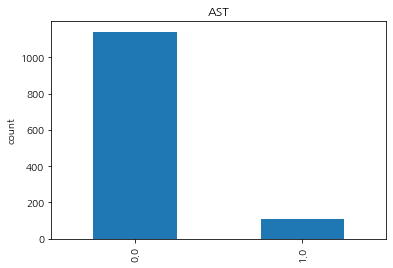

In [ ]:
print(hl['AST'].value_counts())

hl['AST'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('AST')
plt.show()

In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mglearn

# 분류모델

## 1.DecisionTreeClassifier(단일의사결정모델)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = hl.iloc[:, 1:]  
y = hl.iloc[:, 0]   # target 변수 AST

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.911


In [ ]:
# 의사결정나무의 깊이를 3으로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.953
시험용 데이터 정확도: 0.927


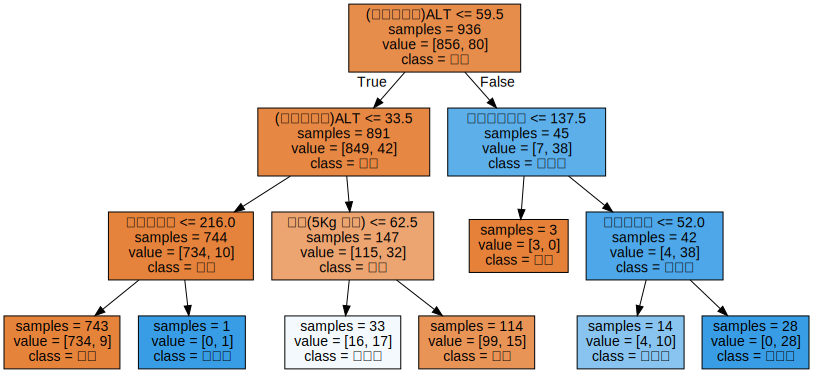

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "정상", "비정상"],
                feature_names=hl.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 주요변수 찾기

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.         0.         0.         0.09379061 0.
 0.         0.         0.         0.         0.         0.
 0.         0.05709387 0.         0.         0.         0.
 0.         0.         0.80586005 0.04325547 0.         0.
 0.         0.         0.        ]


한글 깨짐 방지

In [ ]:
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

주요변수 그래프

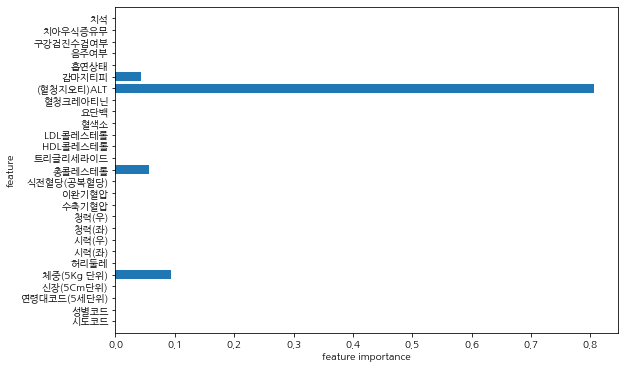

In [ ]:
import numpy as np

def plot_feature_importances_hl(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(hl.columns[1:])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), hl.columns[1:])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
plot_feature_importances_hl(tree)

## 2.랜덤 포레스트

In [ ]:
# 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.939


랜덤 포레스트와 단일 의사결정나무 비교 
- 라인 차트를 그려봄으로써 랜덤포레스트가 의사결정트리보다 대체로 정확도가 높은 것을 확인할 수 있다.

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.88297872 0.81914894 0.90425532 0.92553191 0.90425532 0.90425532
 0.88172043 0.93548387 0.90322581 0.91397849]
Random forest:  [0.92553191 0.95744681 0.93617021 0.95744681 0.94680851 0.94680851
 0.93548387 0.97849462 0.93548387 0.94623656]
Accuracy mean
Decision tree :0.897
Random forest :0.947


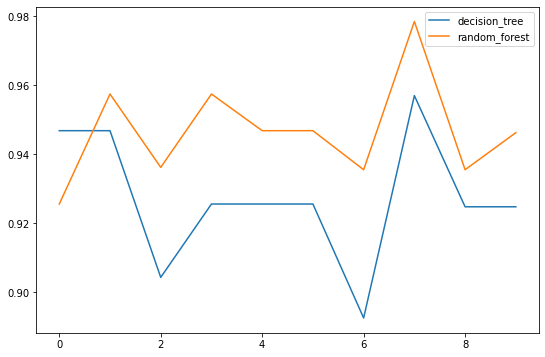

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

## 3. 그래디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.995
시험용 데이터 세트 정확도: 0.930


In [ ]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.976
시험용 데이터 세트 정확도: 0.933


# 분류모델 평가

## 1.교차검증

In [ ]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.88297872 0.81914894 0.90425532 0.92553191 0.90425532 0.90425532
 0.88172043 0.93548387 0.90322581 0.91397849]
Random forest:  [0.92553191 0.95744681 0.93617021 0.95744681 0.94680851 0.94680851
 0.93548387 0.97849462 0.93548387 0.94623656]
Gradient boosting:  [0.93617021 0.96808511 0.92553191 0.95744681 0.93617021 0.94680851
 0.92473118 1.         0.92473118 0.95698925]
Accuracy mean
Decision tree :0.897
Random forest :0.947
Gradient boosting :0.948


## 2.그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3,4], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [ ]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3, 4]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.940171,10,0.935897,0.935897,0.948718
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.940171,10,0.926282,0.945513,0.948718
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.939103,13,0.932692,0.942308,0.942308
3,"{'learning_rate': 0.1, 'max_depth': 4}",0.931624,17,0.929487,0.932692,0.932692
4,"{'learning_rate': 0.08, 'max_depth': 1}",0.942308,7,0.935897,0.939103,0.951923
5,"{'learning_rate': 0.08, 'max_depth': 2}",0.942308,7,0.929487,0.948718,0.948718
6,"{'learning_rate': 0.08, 'max_depth': 3}",0.942308,7,0.939103,0.945513,0.942308
7,"{'learning_rate': 0.08, 'max_depth': 4}",0.931624,17,0.929487,0.935897,0.929487
8,"{'learning_rate': 0.06, 'max_depth': 1}",0.943376,4,0.935897,0.945513,0.948718
9,"{'learning_rate': 0.06, 'max_depth': 2}",0.944444,1,0.935897,0.951923,0.945513


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.06, 'max_depth': 2}
GridSearchCV 최고 정확도: 0.9444


In [ ]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.933


# 결론

중요변수를 살펴보면 ALT, 체중, 총콜레스테롤,감마지티피 순으로 변수의 중요도가 높게 나타난다.

여기서 ALT와 감마지티피는 간과 관련되며 체중과 총콜레스테롤은 비만과 관련된다. 따라서 output 변수인 AST(간세포 손상정도)는 간의 기능을 아우를 뿐만 아니라, 비만율과도 밀접한 관련을 맺는다고 볼 수 있다.

 또한 교차검증을 통한 분류모델 평가 결과 Decision tree :0.897
랜덤포레스트 :0.947
그래디언트부스팅 :0.948로 그래디언트 부스팅 모델의 정확도가 가장 높게 나타났기 때문에 해당 모델을 사용하는 것이 적합하다.

그리드서치를 통해 최적의 파라미터를 살펴본 결과, 'learning_rate': 0.06, max_depth': 2로 선택하는 것이 가장 적합했으며 이 때의 정확률은 시험용 데이터 기준으로 0.933까지 높일 수 있었다.